# 디리클레분포
- https://datascienceschool.net/02%20mathematics/08.07%20베타분포,%20감마분포,%20디리클레%20분포.html

**디리클레분포(Dirichlet distribution)**는 베타분포의 확장판이라고 할 수 있다.
- 베타분포는 0과 1사이의 값을 가지는 단일(univariate) 확률변수의 베이지안 모형에 사용되고
- 디리클레분포는 0과 1사이의 사이의 값을 가지는 다변수(multivariate) 확률변수의 베이지안 모형에 사용된다.

예를 들어 𝐾=3인 디리클레분포를 따르는 확률변수는 다음과 같은 값들을 표본으로 가질 수 있다.

$(0.2, 0.3, 0.5) \\ (0.5, 0.5, 0) \\ (1, 0, 0)$

<br>

## 디리클레분포 확률밀도함수

$\begin{split} 
\begin{align}
\begin{aligned}
\text{Dir}(x;\alpha) 
&= \text{Dir}(x_1, x_2, \cdots, x_K; \alpha_1, \alpha_2, \cdots, \alpha_K) \\
&= \frac{1}{\mathrm{B}(\alpha_1, \alpha_2, \cdots, \alpha_K)} \prod_{i=1}^K x_i^{\alpha_i - 1} 
\end{aligned}
\tag{8.7.14}
\end{align}
\end{split}$

<br>

이 식에서 𝑥=(𝑥1,𝑥2,…,𝑥𝐾)는 디리클레분포의 표본값 벡터이고 𝛼=(𝛼1,𝛼2,…,𝛼𝐾)는 모수 벡터다. B(𝛼1,𝛼2,⋯,𝛼𝐾)는 베타함수라는 특수함수로 다음처럼 정의한다.

$\begin{align}
\mathrm{B}(\alpha_1, \alpha_2, \cdots, \alpha_K) = \frac{\prod_{i=1}^K \Gamma(\alpha_i)} {\Gamma\bigl(\sum_{i=1}^K \alpha_i\bigr)}
\tag{8.7.15}
\end{align}$

디리클레분포의 확률값 𝑥는 다음 제한조건을 따른다.
$\begin{align}
0 \leq x_i \leq 1, \;\;\; \sum_{i=1}^{K} x_i = 1
\tag{8.7.16}
\end{align}$

## 디리클레분포의 응용
다음과 같은 문제를 풀어보자.

x, y, z가 양의 난수일 때 항상 x + y + z = 1이 되게 하려면 어떻게 해야될까요? 모든 경우가 균등하게 나와야 합니다.

- 이 문제는 𝐾=3이고 𝛼1=𝛼2=𝛼3인 디리클레분포의 특수한 경우이다.
- 𝐾=3인 디리클레 문제는 다음 그림과 같이 3차원 공간 상에서 (1,0,0), (0,1,0), (0,0,1) 세 점을 연결하는 정삼각형 면위의 점을 생성하는 문제라고 볼 수 있다.

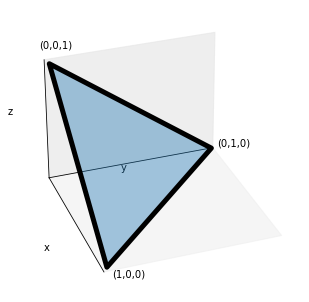

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)

x = [1, 0, 0]
y = [0, 1, 0]
z = [0, 0, 1]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, edgecolor="k", lw=5, alpha=0.4))
ax.text(1, 0, 0, "(1,0,0)", position=(1.1, 0))
ax.text(0, 1, 0, "(0,1,0)", position=(0, 1.04))
ax.text(0, 0, 1, "(0,0,1)", position=(-0.2, 0))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.view_init(30, -20)
tmp_planes = ax.zaxis._PLANES

# set origin 
# http://stackoverflow.com/questions/15042129/changing-position-of-vertical-z-axis-of-3d-plot-matplotlib 참조
ax.yaxis._PLANES = (
    tmp_planes[2], tmp_planes[3],
    tmp_planes[0], tmp_planes[1],
    tmp_planes[4], tmp_planes[5],
)
ax.zaxis._PLANES = (
    tmp_planes[2], tmp_planes[3],
    tmp_planes[0], tmp_planes[1],
    tmp_planes[4], tmp_planes[5],
)

In [6]:
# 다음 함수는 생성된 점들을 2차원 삼각형 위에서 볼 수 있도록 그려주는 함수이다.
def plot_triangle(X, kind):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)

    X1 = (X - n12).dot(m1)
    X2 = (X - n12).dot(m2)

    sns.jointplot(X1, X2, kind=kind, xlim=(-0.8, 0.8), ylim=(-0.1, 1.25))
    plt.show()

- 만약 이 문제를 단순하게 생각하여 서로 독립인 0과 1사이의 유니폼 확률변수를 3개 생성하고 이들의 합이 1이 되도록 크기를 정규화(normalize)하면 다음 그림과 같이 삼각형의 중앙 근처에 많은 확률 분포가 집중된다. 즉, 확률변수가 골고루 분포되지 않는다.

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


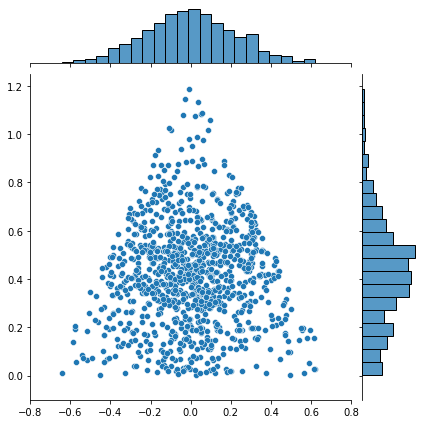

In [8]:
import numpy as np
import seaborn as sns

np.random.seed(0)
X1 = np.random.rand(1000, 3)
X1 = X1 / X1.sum(axis=1)[:, np.newaxis]
plot_triangle(X1, kind="scatter")

다음 그림은 같은 데이터를 2차원 육각 히스토그램(hexagonal histogram)으로 나타낸 것이다. 육각형의 색이 데이터의 빈도를 나타낸다. 데이터가 중앙에 몰려있는 것을 알 수 있다.

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


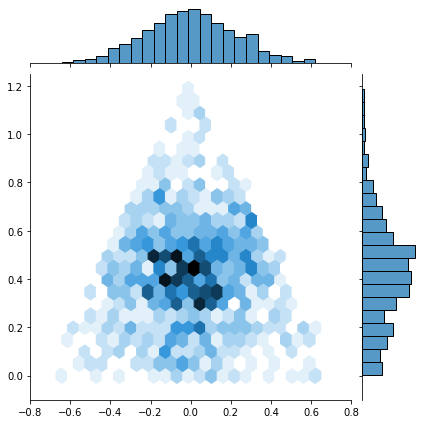

In [9]:
plot_triangle(X1, kind="hex")

그러나 𝛼=(1,1,1)인 디리클레분포는 다음과 같이 골고루 샘플을 생성한다.

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


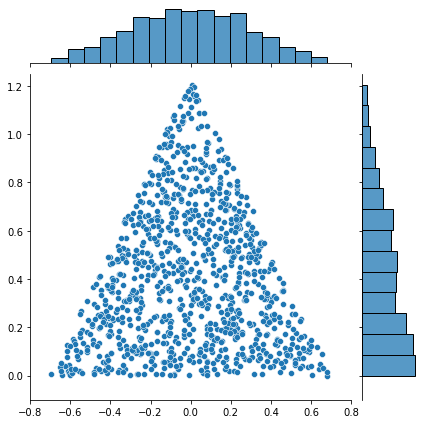

In [11]:
import scipy as sp

X2 = sp.stats.dirichlet((1, 1, 1)).rvs(1000)
plot_triangle(X2, kind="scatter")

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


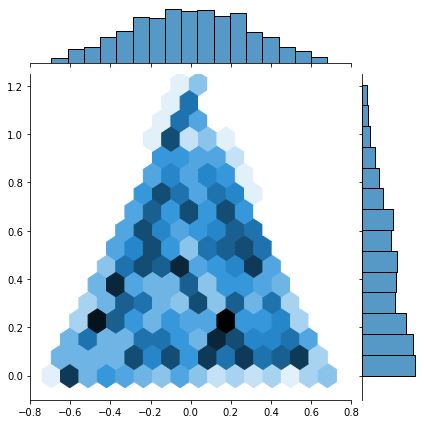

In [12]:
plot_triangle(X2, kind="hex")

## 베이지안 추정
모수 𝛼가 (1,1,1)이 아닌 경우에는 다음과 같이 특정 위치에 분포가 집중되도록 할 수 있다. 이 특성을 이용하면 카테고리분포의 모수 벡터 𝜇를 추정한 결과를 나타낼 수 있다.

In [13]:
def project(x):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)
    return np.dstack([(x - n12).dot(m1), (x - n12).dot(m2)])[0]


def project_reverse(x):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)
    return x[:, 0][:, np.newaxis] * m1 + x[:, 1][:, np.newaxis] * m2 + n12


eps = np.finfo(float).eps * 10
X = project([[1 - eps, 0, 0], [0, 1 - eps, 0], [0, 0, 1 - eps]])

import matplotlib.tri as mtri
triang = mtri.Triangulation(X[:, 0], X[:, 1], [[0, 1, 2]])
refiner = mtri.UniformTriRefiner(triang)
triang2 = refiner.refine_triangulation(subdiv=6)
XYZ = project_reverse(np.dstack([triang2.x, triang2.y, 1 - triang2.x - triang2.y])[0])

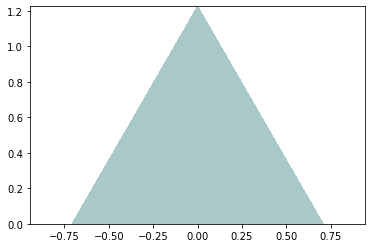

In [14]:
# 모숫값 추정하지 못한 결과
pdf = sp.stats.dirichlet((1, 1, 1)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone)
plt.axis("equal")
plt.show()

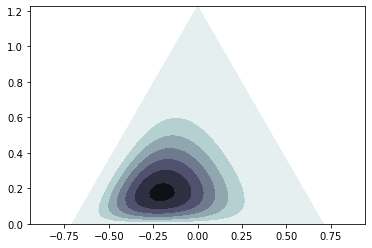

In [15]:
# 카테고리 분포 모수 0.3, 0.5, 0.2 추정 결과
pdf = sp.stats.dirichlet((3, 5, 2)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
plt.axis("equal")
plt.show()

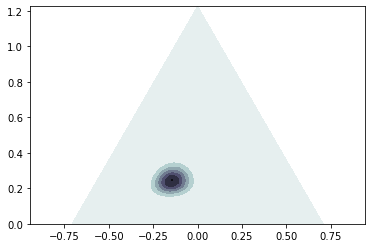

In [16]:
# 다음 결과도 카테고리분포의 모수가 (0.3,0.5,0.2)라고 추정한 것이지만 신뢰도가 훨씬 높은 결과

pdf = sp.stats.dirichlet((30, 50, 20)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
plt.axis("equal")
plt.show()